### Diffusion thermique

On cherche à résoudre numériquement l'équation de diffusion thermique suivante,

$$
\begin{align}
\frac{\partial{u}}{\partial{t}} 
  &= \alpha \nabla^2 u \\
  &= \alpha \left( \frac{\partial^2{u}}{\partial{x}^2} + \frac{\partial^2{u}}{\partial{y}^2} \right)
\end{align}
$$

avec $u = u(\vec{x}, t)$, $\vec{x} \in \Omega$ où $\Omega = [-1,1] \times [-1,1]$

#### Conditions initiales / aux bords

On impose que initialement, il n'y ait pas de diffusion de chaleur dans le milieu,

$$
u(\vec{x}, t=0) = 0
$$

On impose également une température nulle aux bords du domaine $\Omega$ à l'exception du bord inférieur où une température unitaire est imposée.

$$
\begin{array}[rcl]
  u(x = \pm 1, y, t) = 0 &;& u(x, y = 1, t) = 0 &;& u(x, y = -1, t) = 1
\end{array}
$$

#### Méthode numérique

Afin de simuler cette équation nous allons discrétiser le système et en particulier utiliser une méthode à différences finies (grille régulière).

Le système discrétisé est le suivant (on utilisera la notation en indice pour les dérivées),

$$
u_t(x_i, y_j, t_k) = \alpha \left( u_{xx}(x_i, y_j, t_k) + u_{yy}(x_i, y_j, t_k) \right)
$$

On peut prendre un schéma centré type LeapFrog dans l'espace, l'idée est d'évaluer 2 dérivées à mis chemins du pas de temps.

$$
u_{xx}(x_i, y_j, t_k) \approx \frac{u(x_{i+1}, y_j, t_k) - 2u(x_i, y_j, t_k) + u(x_{i-1}, y_j, t_k)}{(\Delta x)^2}
$$

$$
u_{yy}(x_i, y_j, t_k) \approx \frac{u(x, y_{j+1}, t_k) - 2u(x_i, y_j, t_k) + u(x, y_{j-1}, t_k)}{(\Delta y)^2}
$$

On peut également prendre un schéma Euler avant dans le temps (qui est simplement une dérivé première), on appelle ce schéma, un schéma d'ordre 1,

$$
u_{t}(x_i, y_j, t_k) \approx \frac{u(x_i, y_j, t_{k+1}) - u(x_i, y_j, t_k)}{\Delta t}
$$

Pour une méthode aux différences finies, on prend un maillage uniforme: $\Delta x = \Delta y$.

On obtient donc,
$$
\frac{u(x_i, y_j, t_{k+1}) - u(x_i, y_j, t_k)}{\Delta t} = \alpha \left(  \frac{u(x_{i+1}, y_j, t_k) - 2u(x_i, y_j, t_k) + u(x_{i-1}, y_j, t_k)}{(\Delta x)^2} + \frac{u(x, y_{j+1}, t_k) - 2u(x_i, y_j, t_k) + u(x, y_{j-1}, t_k)}{(\Delta x)^2} \right)
$$

Posons, 
$$
\beta = \frac{(\Delta t) \cdot \alpha}{(\Delta x)^2}
$$

Dès lors,
$$
u(x_i, y_j, t_{k+1}) = u(x_i, y_j, t_k) + \beta \left( u(x_{i+1}, y_j, t_k) - 2u(x_i, y_j, t_k) + u(x_{i-1}, y_j, t_k) + u(x, y_{j+1}, t_k) - 2u(x_i, y_j, t_k) + u(x, y_{j-1}, t_k) \right)
$$
$$
u(x_i, y_j, t_{k+1}) = u(x_i, y_j, t_k) + \beta \left( u(x_{i+1}, y_j, t_k) + u(x_{i-1}, y_j, t_k) + u(x, y_{j+1}, t_k) + u(x, y_{j-1}, t_k) - 4u(x_i, y_j, t_k) \right)
$$

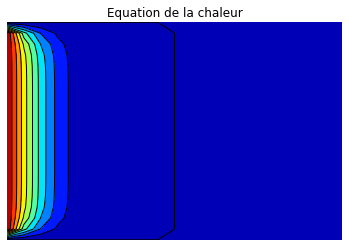

In [7]:
import numpy as np
import matplotlib.pyplot as plt

import matplotlib
colors = matplotlib.cm.jet

# plate size: \Gamma: [-1,1] x [-1,1]
width = height = 2.
# space intervals
dx = dy = 0.1
# thermal diffusivity parameter
alpha = 4

# beta parameter
beta = 0.25

# initial temperature
t0 = 0

# number of steps
nx = int(width/dx)
ny = int(height/dy)
nt = 10

# mesh points in space
x_mesh = np.linspace(start=-1, stop=1, num=nx+1)
y_mesh = np.linspace(start=-1, stop=1, num=ny+1)

# mesh points in time
# numpy doc advice to use linspace 
# instead of arange for decimal time steps.
time_mesh = np.linspace(start=0, stop=1, num=nt+1)

# set initial conditions (t=0)
u0 = t0 * np.ones((nx+1, ny+1))

# numerical solution for each step time
u = u0.copy()

"""
apply finite difference equation, leverage numpy vectors (way faster) instead of python loop
@u: current u solution
@u0: prev u solution (was first initial conditions)
http://hplgit.github.io/fdm-book/doc/pub/diffu/html/._diffu-solarized001.html
https://scipython.com/book/chapter-7-matplotlib/examples/the-two-dimensional-diffusion-equation/
"""
def finite_difference(u, u0, beta):
    # at each time step, compute mesh solution
    for t in range(0,nt):
        u[1:nx, 1:ny] = u0[1:nx, 1:ny] + beta * (u0[2:nx+1, 1:ny] + u0[0:nx-1, 1:ny] + u0[1:nx, 2:ny+1] + u0[1:nx, 0:ny-1] - 4*u0[1:nx, 1:ny])

        # set boundary conditions
        u[0, 1:ny] = 0
        u[nx, 1:ny] = 0
        u[1:nx, 0] = 1
        u[1:ny, ny] = 0

        u0 = u

    return u

def plot_mesh(u):
    plt.contourf(x_mesh, y_mesh, u, time_mesh, cmap=colors)
    plt.contour(x_mesh, y_mesh, u, time_mesh, colors="k", linewidths=1)
    plt.axis("off")
    plt.title("Equation de la chaleur")
    plt.show

result = finite_difference(u, u0, beta)
plot_mesh(result)